# 📚 Libraries and Dependencies

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import openpyxl
import os

main_cwd = os.getcwd()

# 🌏 Plot 1: The Macro Plot

**The Broad Idea**  
As I just ended my internship not long ago, where I was working mainly on transportation and its safety aspects, I am interested to look into the topic of traffic accidents. There was not many open source CSV files which I could use, but I found this PDF file under Singapore Police Force, a Traffic Annual 2024, that illustrates mainly on traffic accidents reported in 2024 (Singapore Police Force, 2024), which I will be using to explore.

In [56]:
traffic_accident_file = os.path.join(main_cwd, './data/traffic_casualities.xlsx')

traffic_accident = pd.read_excel(traffic_accident_file)

traffic_accident.head()

,Year,Total,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2015,"10,563",839,842,970,826,898,843,904,884,811,887,870,989
1,2016,"10,828",908,888,884,864,891,842,963,1037,852,927,930,842
2,2017,"10,074",892,719,847,851,789,811,908,836,812,815,880,914
3,2018,"10,142",898,759,871,829,804,862,831,871,804,862,945,806
4,2019,"9,951",883,749,756,834,824,830,880,765,812,913,858,847


In [57]:
# # Pivot specifically for the heatmap

# traffic_accident_5years = traffic_accident[traffic_accident['Year'] >= 2020]
# traffic_accident_5years.drop(columns=['Total'], inplace=True)

# traffic_accident_long = traffic_accident_5years.melt(id_vars=['Year'], 
#                                 var_name='Month', 
#                                 value_name='Casualties')

# heatmap_matrix = traffic_accident_long.pivot(index='Year', columns='Month', values='Casualties')

# # Ensure the columns follow the calendar, not alphabetical order
# month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# heatmap_matrix = heatmap_matrix[month_order]

# # Plot
# plt.figure(figsize=(12, 8))
# sns.heatmap(heatmap_matrix, 
#             annot=True, 
#             fmt="g", 
#             cmap="YlGnBu", 
#             linewidths=.5,
#             cbar_kws={'label': 'Total Casualties'})

# plt.title("Monthly Road Casualty Intensity (2020-2024)", 
#           fontsize=15, fontweight='bold', pad=20)
# plt.show()

First, I wish to plot the total number of casualities from 2015 to 2024, as a time series plot, to observe for any trends

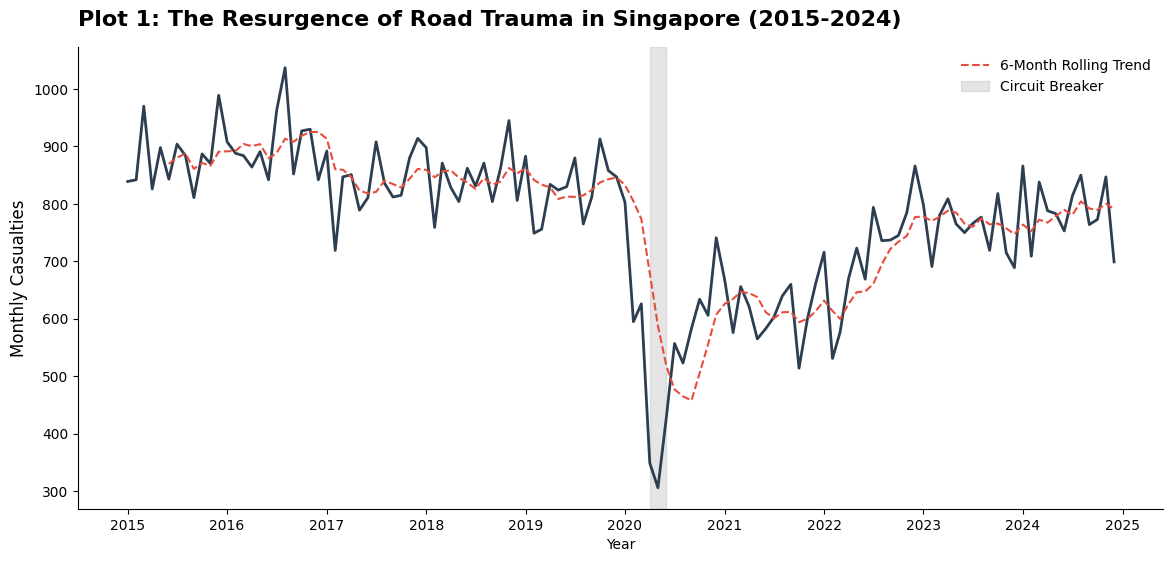

In [58]:
# 1. Clean the Month column (remove extra spaces from PDF extraction)
traffic_accident = traffic_accident.drop(columns=['Total'])

traffic_accident_long = traffic_accident.melt(id_vars=['Year'], 
                                var_name='Month', 
                                value_name='Casualties')
traffic_accident_long['Month'] = traffic_accident_long['Month'].str.strip()

# 2. Create the Date column
# We tell pandas the format is Year-Month (e.g., 2024-Jan)
traffic_accident_long['Date'] = pd.to_datetime(
    traffic_accident_long['Year'].astype(str) + '-' + traffic_accident_long['Month'], 
    format='%Y-%b'
)

# 3. Sort chronologically so the lines don't "zig-zag"
traffic_accident_long = traffic_accident_long.sort_values('Date')

plt.figure(figsize=(14, 6))

# Use Seaborn for a clean look
sns.lineplot(data=traffic_accident_long, x='Date', y='Casualties', 
             color='#2c3e50', linewidth=2)

# VISIONARY TOUCH: Add a Rolling Average 
# This helps the reader see the "Signal" through the "Noise"
traffic_accident_long['Trend'] = traffic_accident_long['Casualties'].rolling(window=6).mean()
plt.plot(traffic_accident_long['Date'], traffic_accident_long['Trend'], 
         color='#e74c3c', linestyle='--', label='6-Month Rolling Trend')

# CLINICAL INSIGHT: Highlight the COVID-19 Circuit Breaker
plt.axvspan('2020-04-01', '2020-06-01', color='gray', alpha=0.2, label='Circuit Breaker')

# VIPER Formatting
plt.title("Plot 1: The Resurgence of Road Trauma in Singapore (2015-2024)", 
          fontsize=16, fontweight='bold', loc='left', pad=15)
plt.ylabel("Monthly Casualties", fontsize=12)
plt.xlabel("Year") # Date axis is self-explanatory
plt.legend(frameon=False)
sns.despine() # Remove top/right borders for a modern look

plt.show()